# Length of Stay Model
### Machine Learning Assignment 1 - s3663431 Alexander Ruberto

## Problem
For hospitals, the ability to predict length of stay (LOS) of a patient as early as possible (at the admission stage) is very useful in managing its resources.

Predict if a patient will be discharged from hospital early  or stay in hospital for an extended period.
'Predict if a given patient (i.e. newborn child) will be discharged from the hospital within 3 days (class 0) or will stay in hospital beyond that - 4 days or more (class 1)'

The target column LengthOfStay will need to be transformed into the two classes above:
- LengthOfStay < 4 = 0
- LengthOfStay >= 4 = 1

## Category
This is a supervised classification task as we are given input values to predict an unknown target which is classed into 0 or 1.


# Investigate Data: Exploratory Data Analysis


## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

health_data_frame = pd.read_csv('./train_data.csv', delimiter=',')
health_data_frame.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


## Basic Overall Analysis

We aim to get a greater overall insight into our data, what it is representing and whether we may need to perform any pre-processing to cleanse the data.

### Shape of Data

Rows: 59966
Cols: 16

We can see from this that we have a large number of attributes which may restrict our ability to extend upon them too much due to data limits. We also have a good sample size and should be able to transform as needed. 

In [2]:
health_data_frame.shape

(59966, 16)

### Info

Get basic information such as data types and null values

All columns attributes have the same number of rows and no nulls, therefore we don't have to fill in any missing values. We can see that we have a mix of numerical data represented as integers and some categoricals as objects.

In [3]:
health_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFacility         59966 non-null  int64 
 13  AverageChargesIn

#### Nulls

Double checking for any nulls.

In [4]:
health_data_frame.isnull().sum()

ID                              0
HealthServiceArea               0
Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
LengthOfStay                    0
dtype: int64

## Converting Target to Categorical

As our target is to determine whether LengthOfStay is < 4 days or >= 4 days, we can represent this as a binary values 1 and 0.

We can convert this column in order to form this categorical variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFacility         59966 non-null  int64 
 13  AverageChargesIn

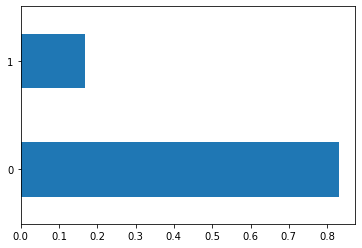

In [5]:
# Convert LOS to 1 if greater than 3, 0 otherwise
health_data_frame['LOS'] = (health_data_frame.LengthOfStay.values > 3).astype(np.uint8)

health_data_frame['LOS'].value_counts(normalize=True).plot.barh()
health_data_frame.info()

## Categorical or Numerical Variables

Categorical Variables: These are data points that take on a finite number of values, AND whose values do not have a numerical interpretation.

- Ordinal categorical variables take on values which can be logically ordered. For example, the reviews for a product which are given as 0-5 stars.

- Nominal categorical variables cannot be put in any logical order. Examples of this would be the gender, race, etc.

Numerical Variables: These are variables which are numerical in nature

- Continuous Variables: Take on a continuous values (no breaks). For example, height, weight.

- Discrete numerical variables take on a set of values which can be counted. For example, the number of rooms in a house.

### ID

Unique number to represent patient ID (not an attribute)

### HealthServiceArea

A description of the Health Service Area (HSA) in which the hospital is located.
- Capital/Adirondack, Central NY, Finger Lakes, Hudson Valley, Long Island, New York City, Southern Tier, Western NY. (not an attribute)

### Gender

Patient gender: (M) Male, (F) Female, (U) Unknown.
- **Categorical-Nominal**

### Race

Patient race. Black/African American, Multi, Other Race, Unknown, White. Other Race includes Native Americans and Asian/Pacific Islander.
- **Categorical-Nominal**

### TypeOfAdmission

A description of the manner in which the patient was admitted to the health care facility: Elective, Emergency, Newborn, Not Available, Trauma, Urgent.
- **Categorical-Nominal**

### CCSProcedureCode

AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code
- **Categorical-Nominal**

### APRSeverityOfIllnessCode

All Patient Refined Severity of Illness (APR SOI) Description: Minor (1), Moderate (2), Major (3), Extreme (4)
- **Categorical-Ordinal**

### PaymentTypology

A description of the type of payment for this occurrence.
- **Categorical-Nominal**

### BirthWeight

The neonate birth weight in grams; rounded to nearest 100g.
- **Numerical-Continuous**

### EmergencyDepartmentIndicator

Emergency Department Indicator is set based on the submitted revenue codes. If the record contained an Emergency Department revenue code of 045X, the indicator is set to "Y", otherwise it will be "N".
- **Categorical-Nominal**

### AverageCostInCounty

Average hospitalization Cost In County of the patient
- **Numerical-Continuous**

### AverageChargesInCounty

Average medical Charges In County of the patient
- **Numerical-Continuous**

### AverageCostInFacility

Average Cost In Facility
- **Numerical-Continuous**

### AverageChargesInFacility

Average Charges In Facility
- **Numerical-Continuous**

### AverageIncomeInZipCode

Average Income In Zip Code
- **Numerical-Continuous**

### LengthOfStay
The total number of patient days at an acute level and/or other than acute care level.
Need to be transformed to match the task class 0 id LengthOfStay <4 and class 1 otherwise (TARGET)
- **Numerical-Contiuous -> Categorical-Ordinal**

### Assign Categoricals and Numericals

In [6]:
categoricals = ['Gender', 'Race', 'TypeOfAdmission', 'CCSProcedureCode', 'APRSeverityOfIllnessCode', 'PaymentTypology', 'EmergencyDepartmentIndicator']
categorical_nominal = ['Gender', 'Race', 'TypeOfAdmission', 'CCSProcedureCode', 'PaymentTypology', 'EmergencyDepartmentIndicator']
categorical_ordinal = ['APRSeverityOfIllnessCode']

numericals = ['BirthWeight', 'AverageCostInCounty', 'AverageChargesInCounty', 'AverageCostInFacility', 'AverageChargesInFacility', 'AverageIncomeInZipCode']

target = ['LengthOfStay', 'LOS']

## Univariate Analysis

### Categoricals

#### APRSeverityOfIllnessCode
- Majority are severity 1 and decreasing a lot to reach level 2
- Not a lot of severity 3 and under-represented 4

#### LengthOfStay
- Majority 2 and 3 days, not much occurrence for greater than 4 days

1    0.799670
2    0.146083
3    0.054231
4    0.000017
Name: APRSeverityOfIllnessCode, dtype: float64


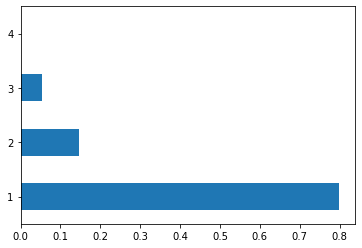

2     0.416903
3     0.266818
1     0.148334
4     0.125138
5     0.022379
6     0.009289
7     0.005770
8     0.002418
9     0.001618
10    0.001334
Name: LengthOfStay, dtype: float64


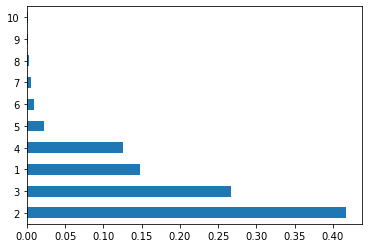

0    0.832055
1    0.167945
Name: LOS, dtype: float64


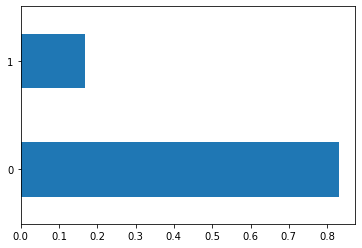

In [7]:
for col in categorical_ordinal + target:
    print(health_data_frame[col].value_counts(normalize=True))

    health_data_frame[col].value_counts(normalize=True).plot.barh()
    plt.show()

#### Gender
- Fairly even amounts of male to female, not many unknown
- Majority Male

#### Race
- Majority White, then Other, then Black/African American
- Not many multi-racial

#### TypeOfAdmission
- Clear majority are newborns
- Other types are severely under-represented

#### CCSProcedureCode
- Majority code of 228, even amounts of 220, 0, 115
- Low amounts of 216, -1 and 231

#### PaymentTypology
- Majority Medicaid then even amounts PHS and Blue Cross
- Not a lot of anything else

#### EmergyencyDepartmentIndicator
- Not much Y at all

M    0.516593
F    0.483391
U    0.000017
Name: Gender, dtype: float64


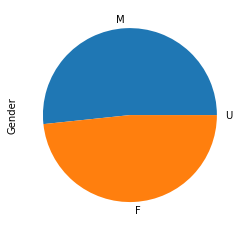

White                     0.549361
Other Race                0.305406
Black/African American    0.136461
Multi-racial              0.008772
Name: Race, dtype: float64


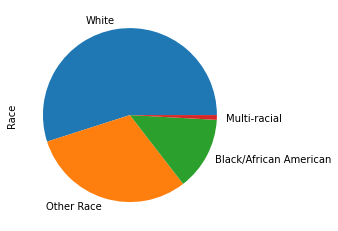

Newborn      0.979572
Emergency    0.010990
Urgent       0.006871
Elective     0.002568
Name: TypeOfAdmission, dtype: float64


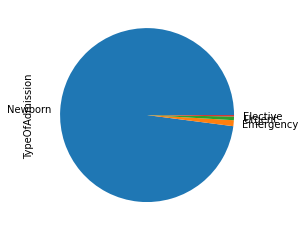

 228    0.331621
 115    0.227262
 0      0.186589
 220    0.179652
 231    0.049712
-1      0.012824
 216    0.012340
Name: CCSProcedureCode, dtype: float64


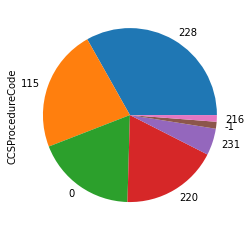

Medicaid                     0.478988
Private Health Insurance     0.260281
Blue Cross/Blue Shield       0.201331
Self-Pay                     0.033085
Federal/State/Local/VA       0.014158
Managed Care, Unspecified    0.009088
Miscellaneous/Other          0.001968
Medicare                     0.000734
Unknown                      0.000367
Name: PaymentTypology, dtype: float64


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


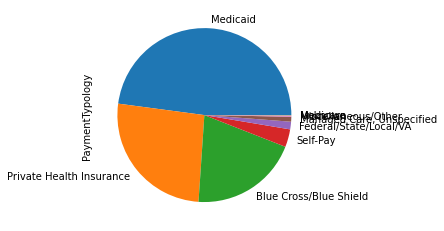

N    0.991445
Y    0.008555
Name: EmergencyDepartmentIndicator, dtype: float64


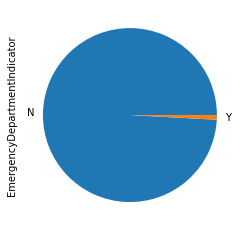

In [8]:
for col in categorical_nominal:
    print(health_data_frame[col].value_counts(normalize=True))

    health_data_frame[col].value_counts(normalize=True).plot.pie()
    plt.show()

## Numericals

Describe numerical data for an overall analysis

- We can see here that there is a big range between the min and max values for costs and charges, however the mean is generally on the higher side for the County and in the middle for the facility.

- Average income is clearly on the low side on average.

- Length of stay is around 2 days on average.

In [9]:
health_data_frame.describe()

,ID,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,LOS
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,29983.500000,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405,0.167945
std,17310.837458,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246,0.373821
min,1.000000,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000,0.000000
25%,14992.250000,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000,0.000000
50%,29983.500000,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000,0.000000
75%,44974.750000,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000,0.000000
max,59966.000000,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000,1.000000


### Distribution

We have already seen categorical distribution above however we can also see the overall numerical distribution here as well.

**BirthWeight** - skewed to the low side with not a lot of values > 5000

**AverageCostInCounty** - majority is on 2000, however slightly skewed to the greater side

**AverageChargesInCounty** - skewed to the greater side, not a lot of values in the middle

**AverageCostInFacility** - skewed to the low side with not a lot of values > 6000. Predominantly 2000

**AverageChargesInFacility** - good distribution overall

**AveragIncomeInZipCode** - skewed heavily towards the low side, spiking on the major values by 20s

**LengthOfStay** - major distribution around 2-4 and skewed to the low side, not a lot of values > 4

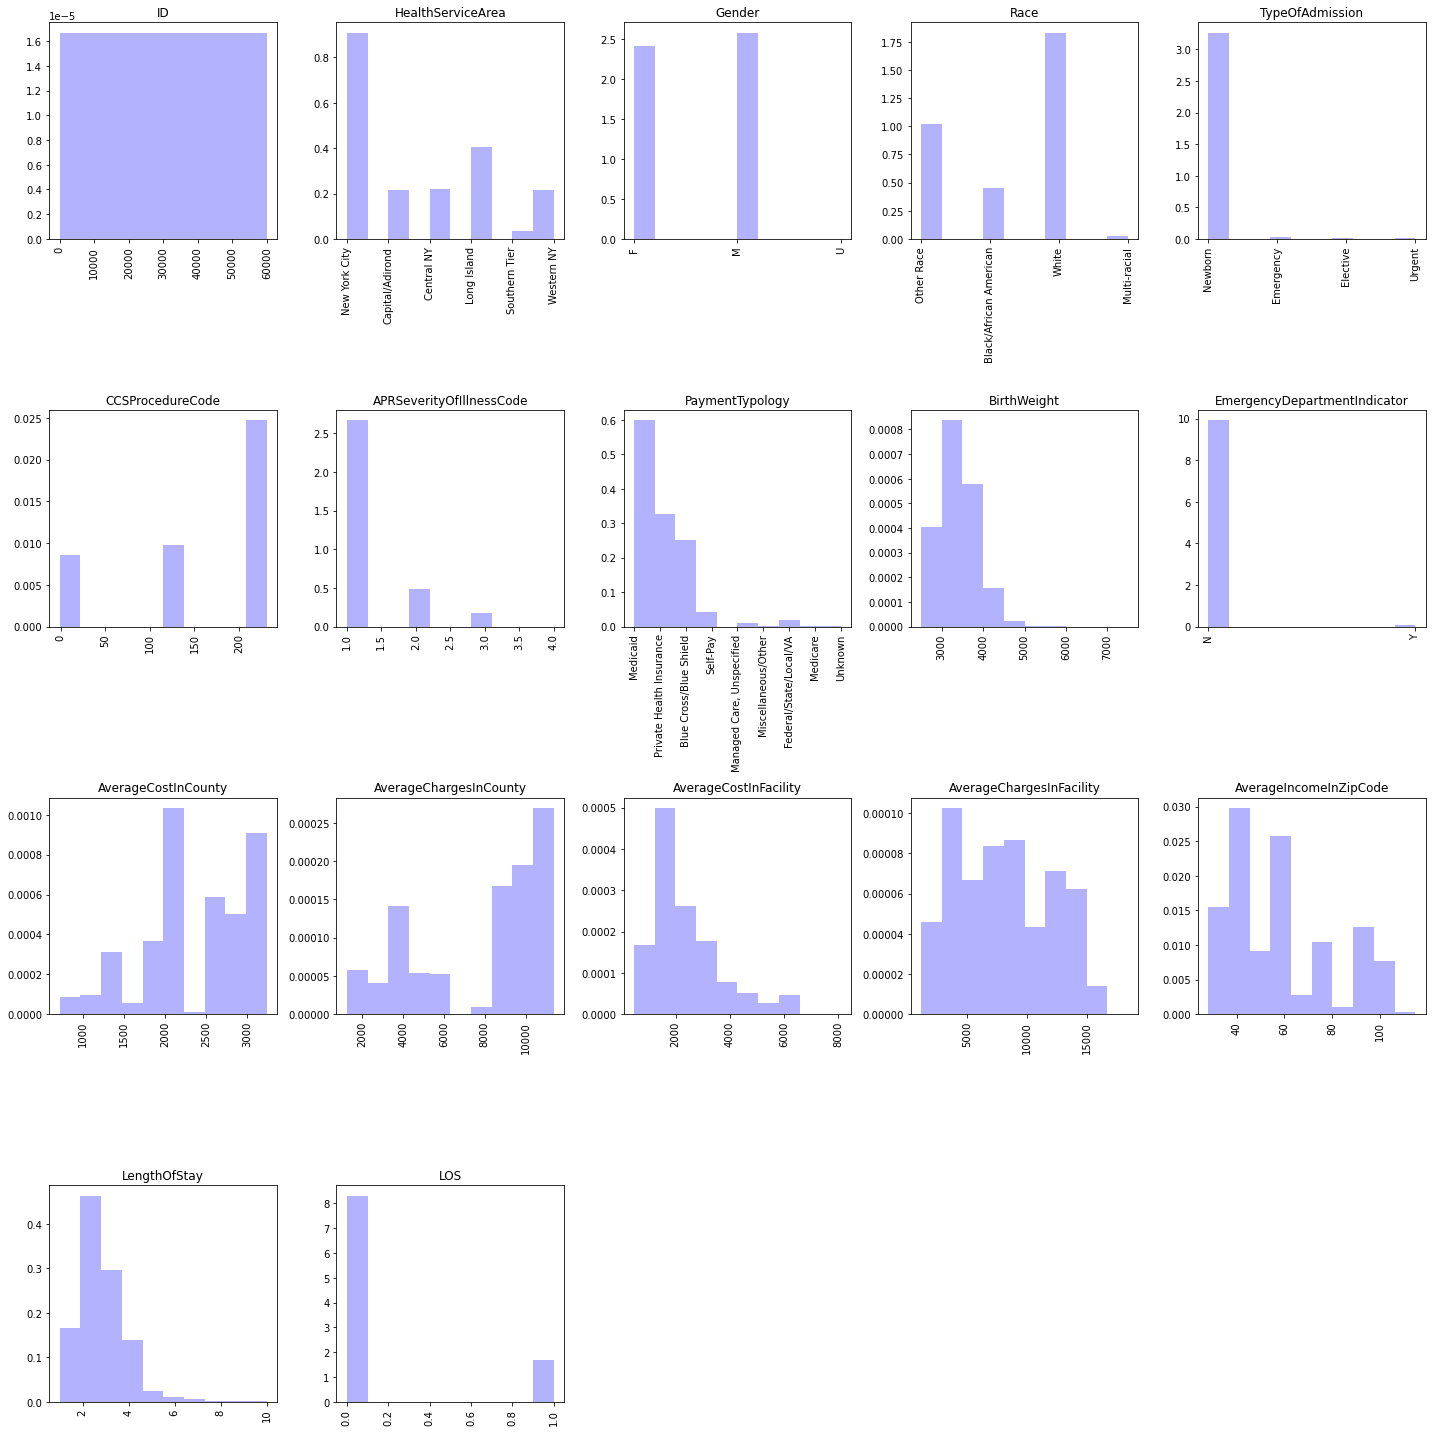

In [10]:
plt.figure(figsize=(20,20))
for i, col in enumerate(health_data_frame.columns):
    plt.subplot(4,5,i+1)
    plt.hist(health_data_frame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    
    
plt.tight_layout()

## Bivariate Analysis
Here we are measuring the effect of one attribute on another to identify any trends in how they relate

### Numericals

#### Pair Plots

Plotting attributes against each other.

Note: LengthOfStay is plotted into each comparison as the hue.

**BirthWeight**
- Even distribution with LengthOfStay values plotted, < 4 days looks like it has more values in the higher BirthWeights
- Follows the distribution of all other attributes closely, not much relationship there
- Capped around 5500

**Charges and Costs**
- Mostly identical relationship with LengthOfStay for each charge and cost, no change in distribution for either value.
- Can draw a linear relationship with AverageCostInCounty, AverageChargesInCounty, AverageCostInFacility and AverageChargesInFacility
- Grouping around 40-60 AverageIncomeInZipCode\

**AverageIncomeInZipCode**
- When average income is high >70 the cost and charges are higher by county, even distribution of LengthOfStay amongst this.
- No clear change of relationship with LengthOfStay

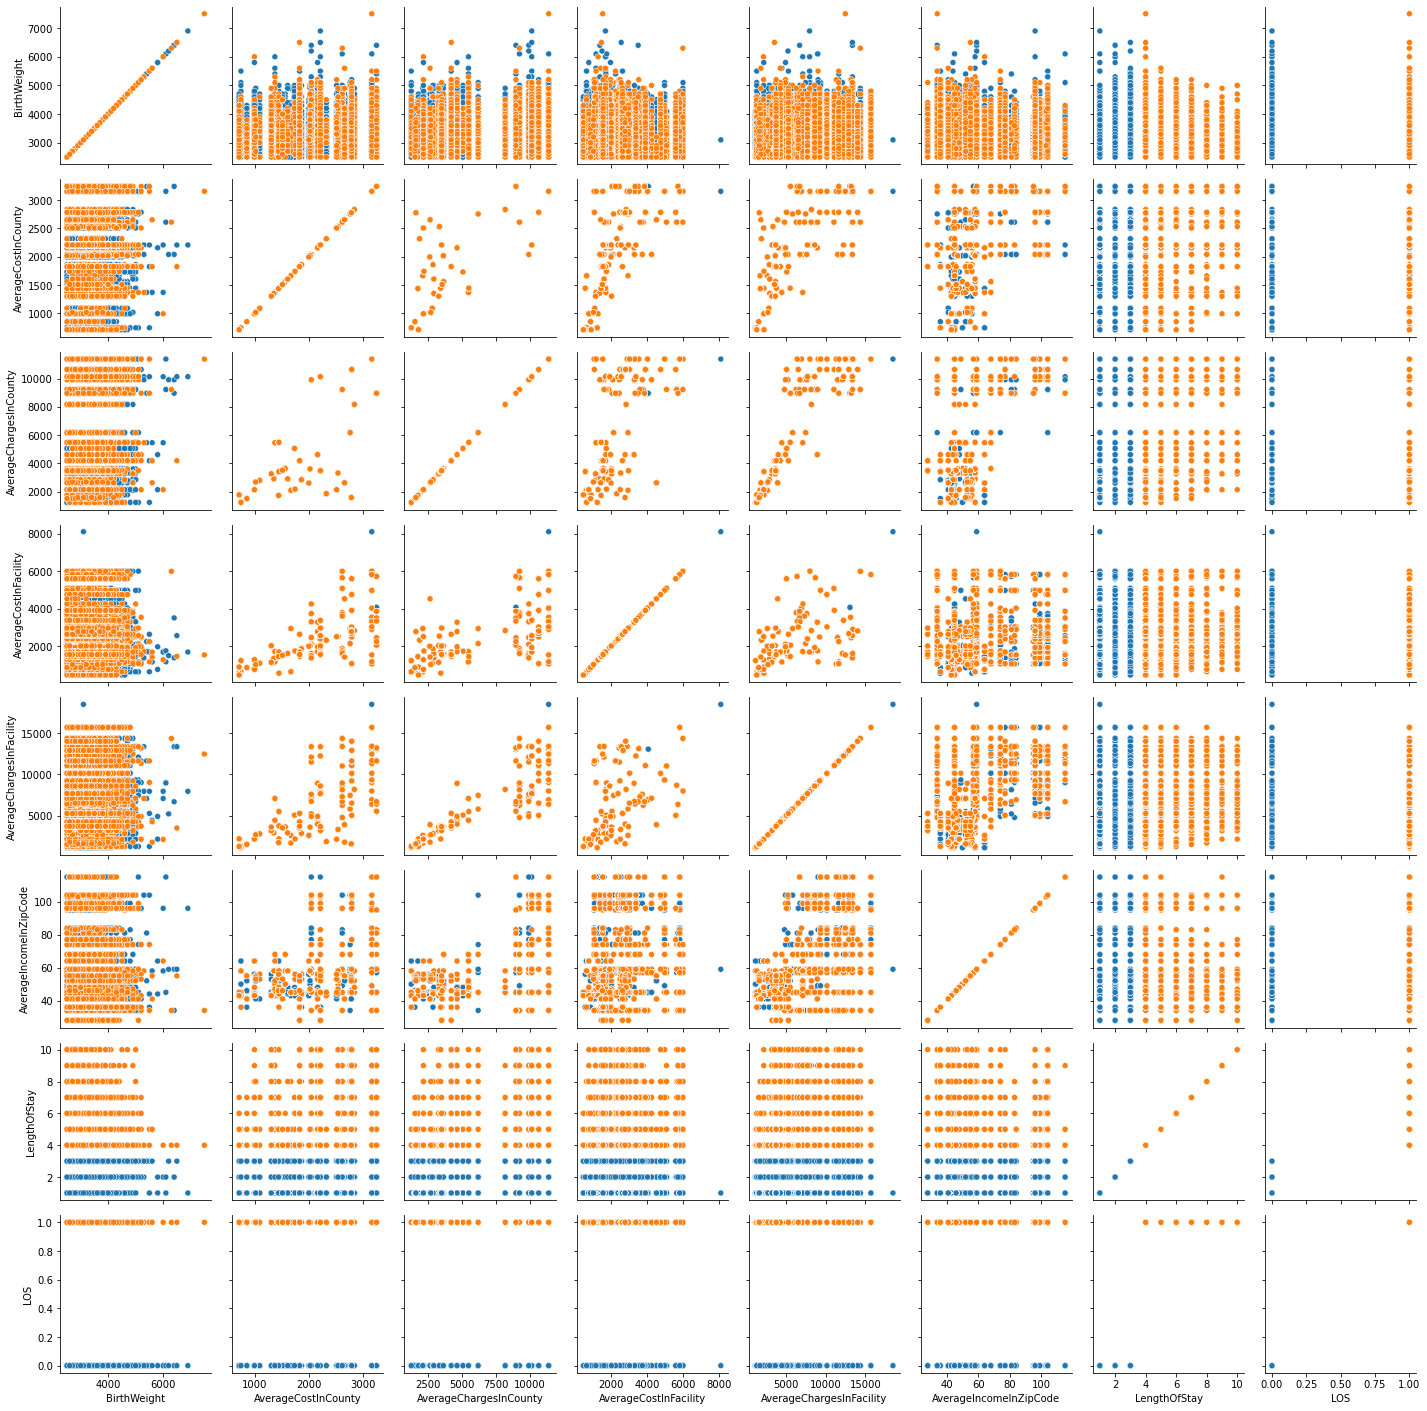

In [11]:
g = sns.PairGrid(data = health_data_frame, vars=numericals+target, hue="LOS")
g.map(sns.scatterplot)
plt.show()

#### Correlation

Here we can see whether attributes tend to move with each other, does one effect the other?

**BirthWeight**
- Doesn't have a relationship with anything

**Charges and Costs**
- Decent correlation between all charges and costs
- Strongest correlation between charges in County and Facility

**AverageIncomeInZipCode**
- Good correlation with AverageChargesInCounty and Facility

**LengthOfStay**
- Little correlation with any attribute
- Most correlation with AverageChargesInCounty and AverageChargesInFacility

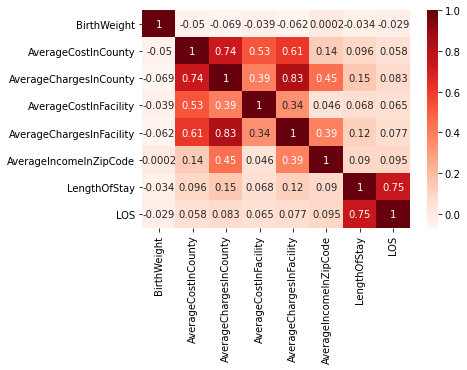

In [12]:
health_data_frame[numericals + target].corr()

sns.heatmap(health_data_frame[numericals+target].corr(), annot=True, cmap = 'Reds')
plt.show()

### Numeric vs Categorical

As our target is categorical, we will find our greatest insights here

#### Box Plots

We can use box plots in order to plot numeric attributes against categorical and find any relationships.

**Gender**
- Males have a slightly higher birthweight as per the IQR
- Females have a smaller maximum value for AverageChargesInFacility
- All other variables are similar

**Race**
- White has a slightly higher birthweight through the IQR
- White has lower costs through the county and facility, lower maximum cost in facility
- White has a large IQR for the charges in the county
- Black/African American and Other Race has a very high minimum charges in the county
- Multi-Racial has a large average charges in the facility by IQR
- Black has the lowest income in zip code by IQR and a much lower max

**TypeOfAdmission**
- Urgent admissions have the lowest IQR by cost in county
- Emergency admission have the highest IQR by charges in county and the highest min
- Urgent admissions have a large range IQR by average income in zip code
- Newborns have a high IQR and larger max stay


**CCSProcedureCode**
- Code 220 has the highest minimum cost in county
- Code 220 has the highest IQR by charges in county
- Code 228 has the highest min by charges in county
- Code 0 has the biggest range of IQR by average income in zip code
- Procedure 216 has a higher IQR for length of stay and big difference between max and min
- Procedire 231 and has a large maximum as does -1 procedure


**APRSeverityIllnessCode**
- Severity 1 has the lowest IQR by cost in county
- Severitu 1 has the largest range of IQR by charges in facility
- Quite consistent elsewhere
- As the severity of illness increases the IQR increases as does the maximum stay


**PaymentTypology**
- Low Max birthweight for Unknown
- Low IQR Costs and Charges for brown and pink payment 
- Pink has the largest max stay
- Unknown has the highest IQR

**EmergencyDepartmentIndicator**
- Higher IQR Costs for Y
- Lower Range Y for ChargesInCounty, high IQR
- Max and Min are low for Y, no IQR

**LOS**
- Greater max birth weight when longer LOS
- Greater median average cost and charges overall when LOS is longer
- Smaller IQR for average charges in county when LOS is longer
- Slightly higher IQR with cost and charges in facility when LOS is longer
- Large IQR for average income when LOS is longer, income range is low when LOS is short.

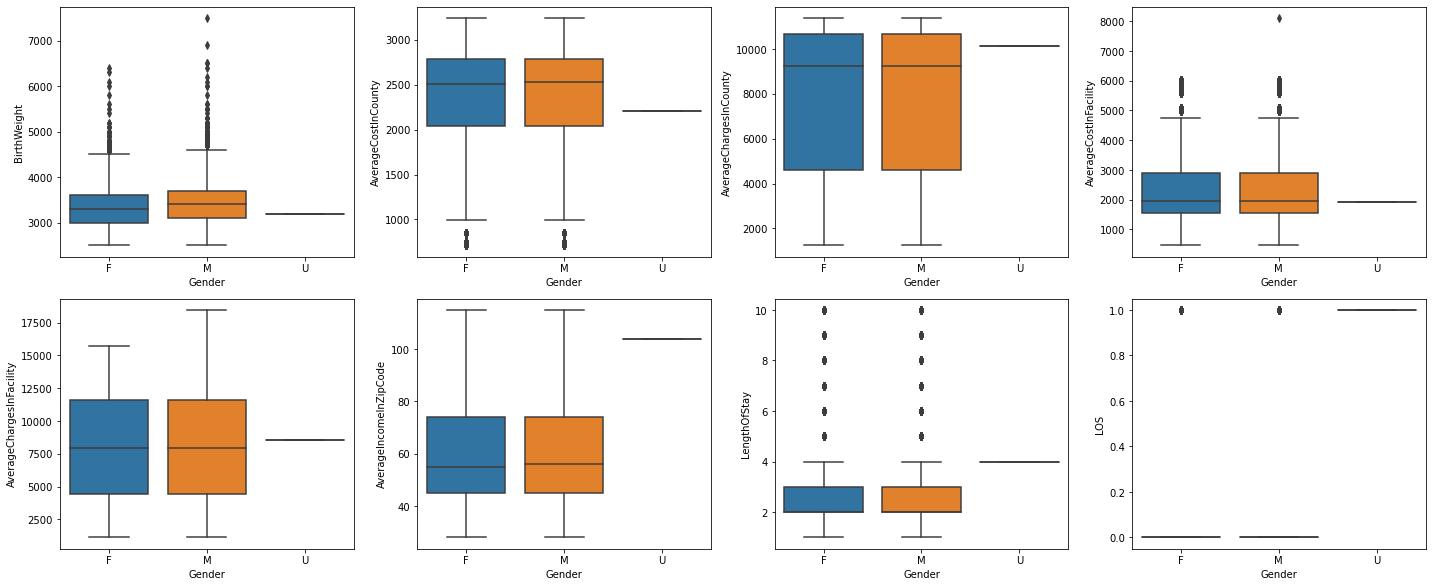

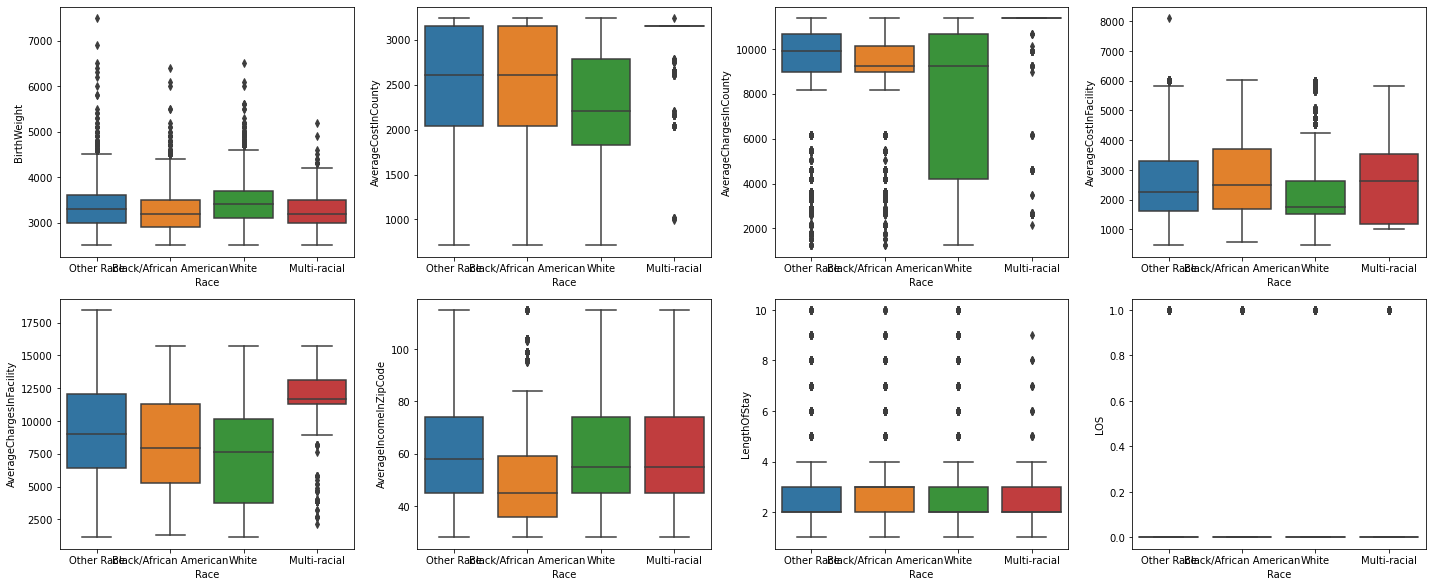

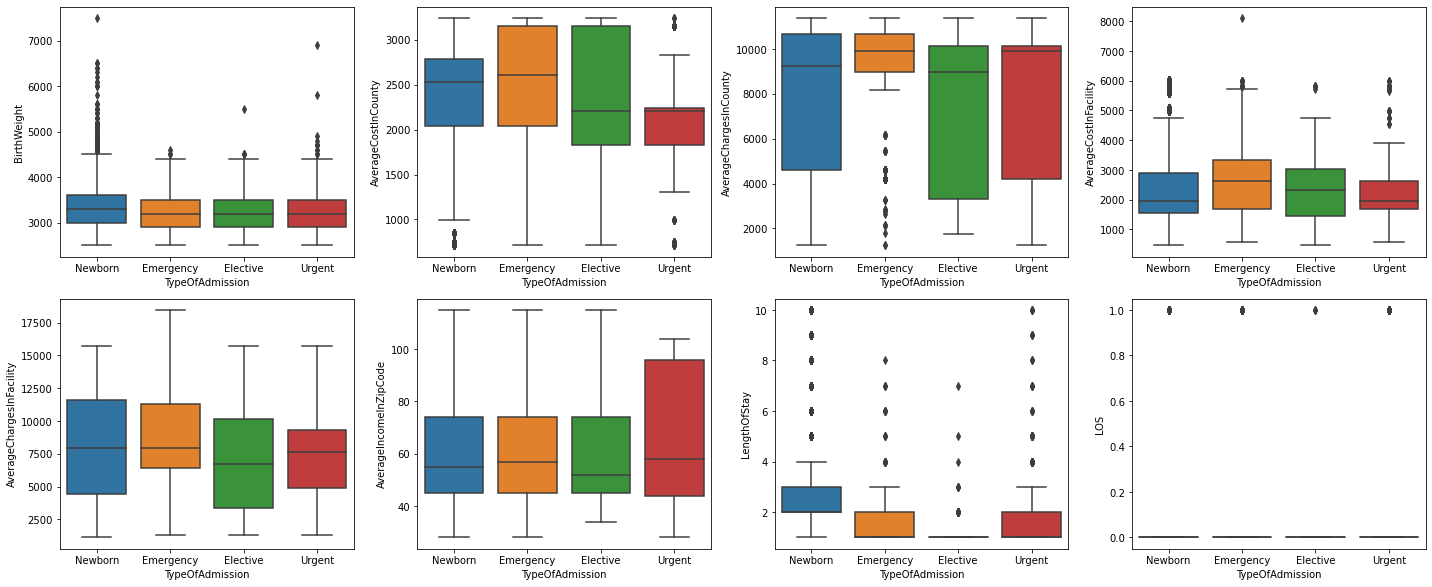

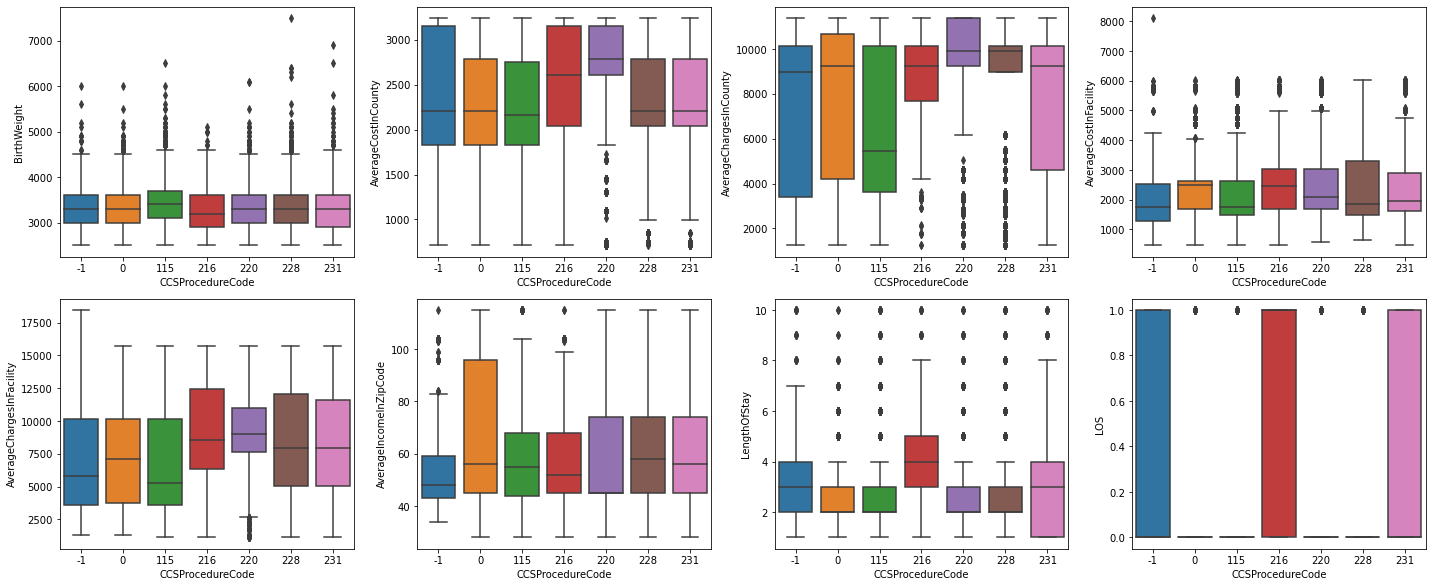

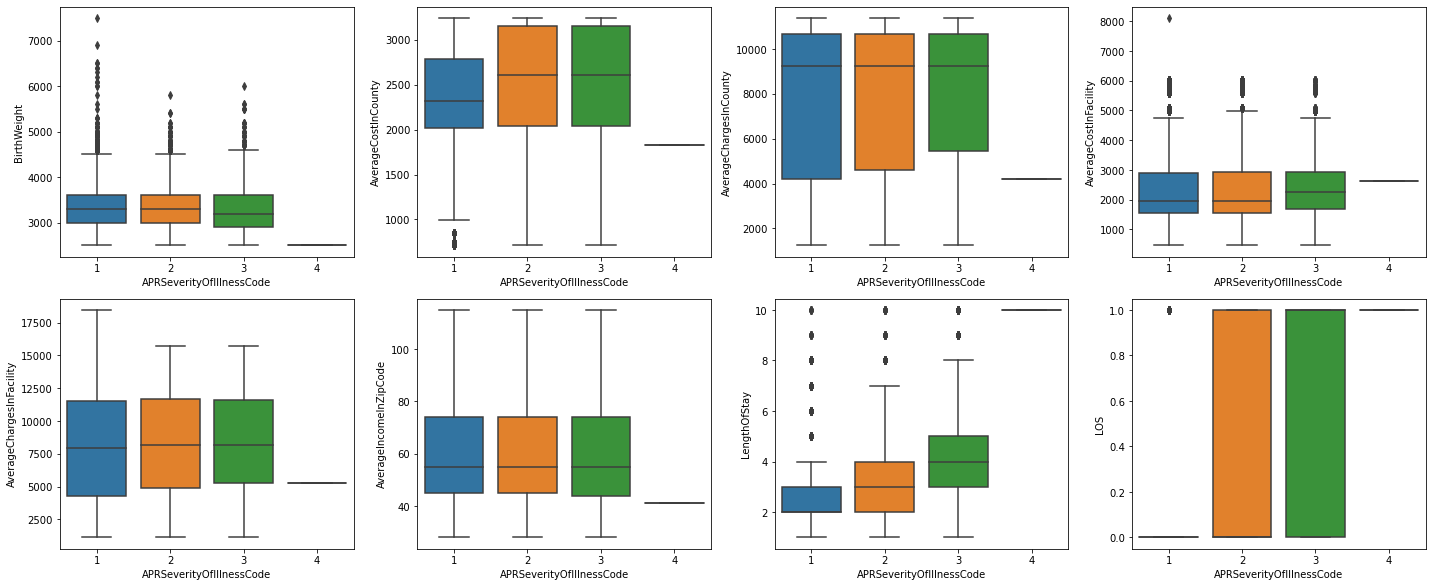

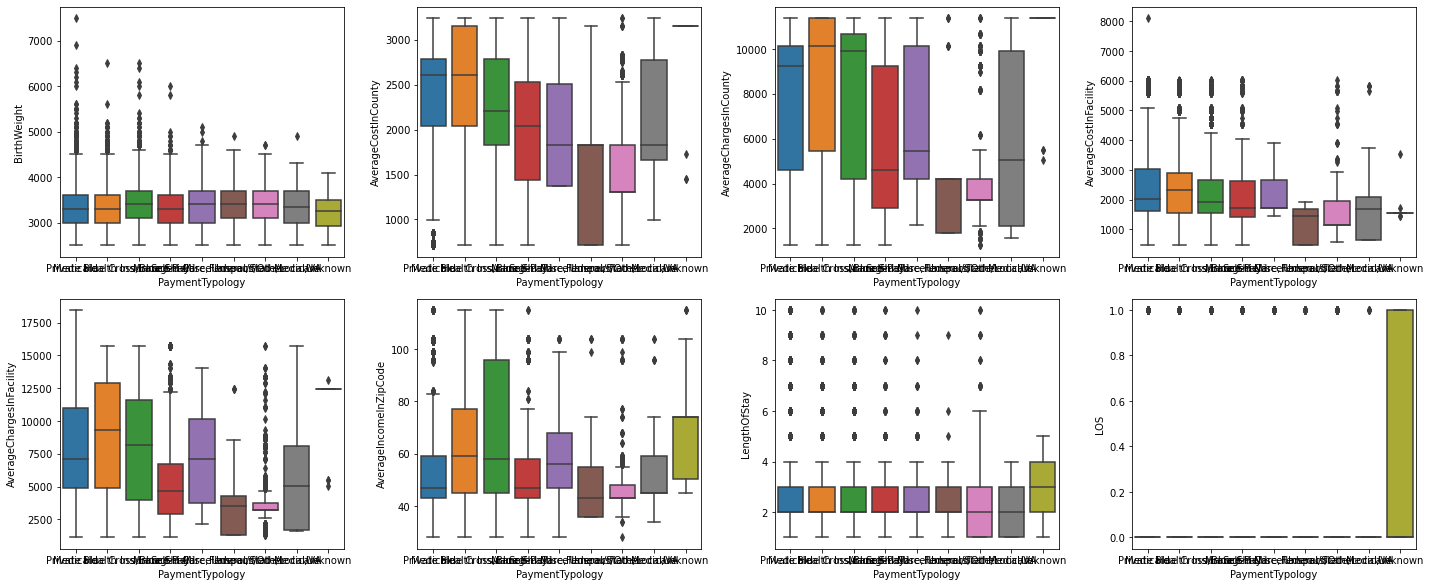

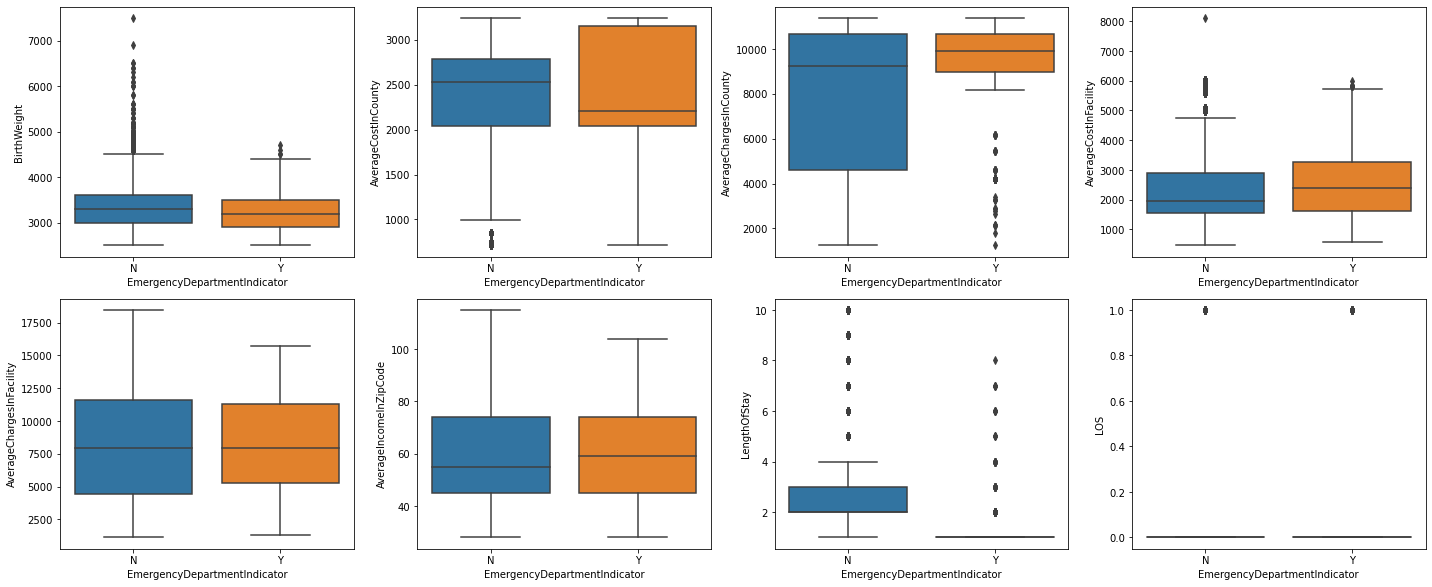

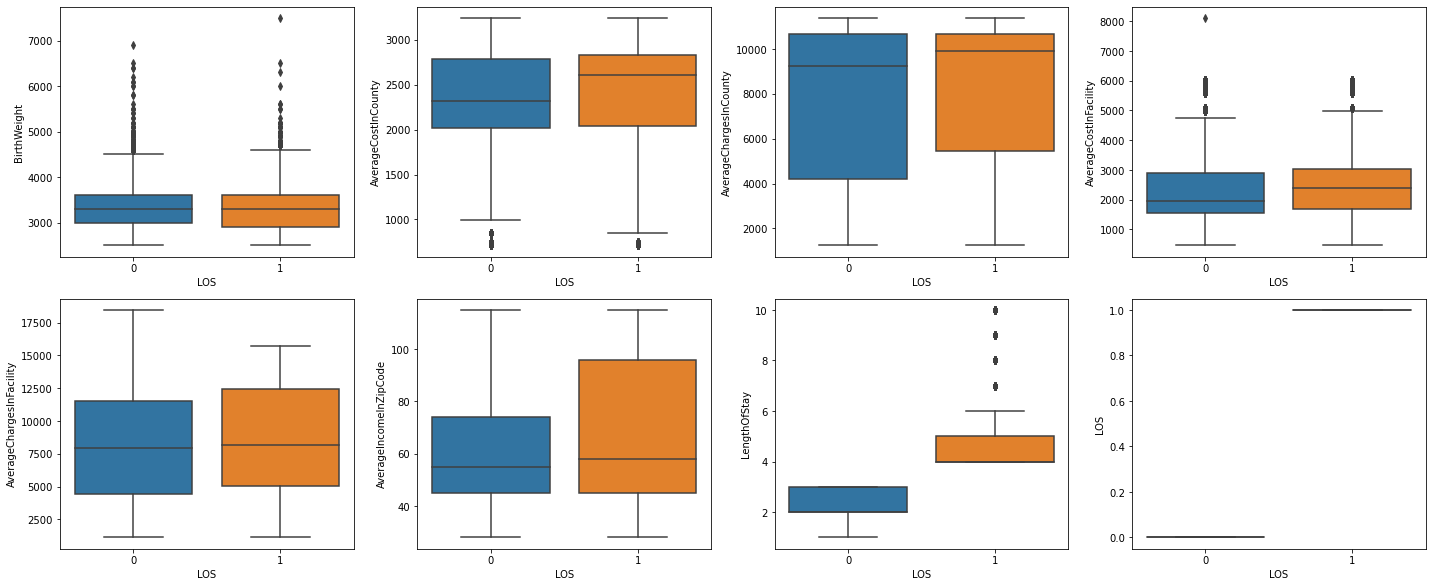

In [13]:
for c in categoricals+['LOS']:
    plt.figure(figsize=(20,20))
    for i, n in enumerate(numericals+target):
        plt.subplot(5, 4, i + 1)
        sns.boxplot(x=health_data_frame[c], y=health_data_frame[n])
        
    plt.tight_layout()


**Plotting just LOS**

We can see that due to the low amounts of values > 4 days the box plot is treating them as outliers

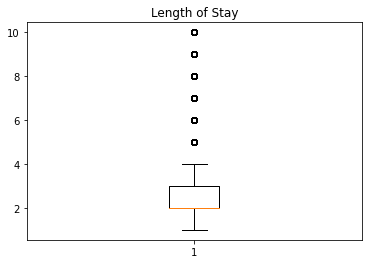

In [14]:
plt.boxplot(health_data_frame['LengthOfStay'])
plt.title('Length of Stay')
plt.show()

#### Overall Correlation
We can see all correlations which we derived earlier from the numerical analysis however we can also see relationships with length of stay here.

- Largest LengthOfStay correlation with severity of illness
- Slightly negative correlation with birth weight.

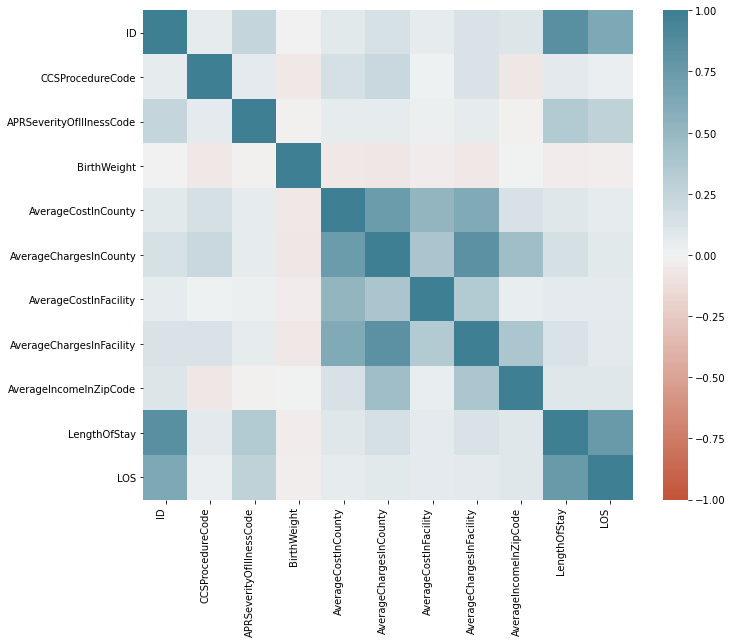

In [15]:
f, ax = plt.subplots(figsize=(11, 9))
corr = health_data_frame.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### Mathematical Relationship with LOS
- We can see that the mean and median  for all attributes are higher when LOS is 1, except for BirthWeight

In [16]:
health_data_frame.groupby('LOS')[numericals].agg([np.mean, np.median])

BirthWeight        AverageCostInCounty        AverageChargesInCounty  \
            mean median                mean median                   mean   
LOS                                                                         
0    3342.166550   3300         2356.258864   2318            7859.097425   
1    3307.228676   3300         2454.789991   2611            8573.791977   

           AverageCostInFacility        AverageChargesInFacility         \
    median                  mean median                     mean median   
LOS                                                                       
0     9227           2360.053112   1967              7824.458743   7945   
1     9917           2576.559527   2390              8622.421110   8172   

    AverageIncomeInZipCode         
                      mean median  
LOS                                
0                58.894458     55  
1                64.352696     58

## Findings

- Costs and charges are higher for a greater length of stay which makes sense as they will be increased the longer a patient is there
- Average income is also higher, which could mean that lower income patients do not have the means to stay a longer time
- Severity of illness seems to correlate well with the length of stay, this could mean that the more severe illnesses need a greater time to treat
- BirthWeight has a negative correlation and therefore it seems that a higher birth weight will require a longer time in hospital
- Most of our data has a length of stay between 2-4 and 2 days on average

# Model Development

Now that we have completed our EDA, we can start to develop our model with the findings and overall insight.

## Performance Metric

As this is a classification task, we will use classification measures in order to evaluate the performance

This includes measures from the confusion matrix, namely the F1 Score. The F1 score is the harmonic mean of both the precision and recall values of a model. Given this, it performs better for imbalanced data sets (Jayaswal, 2020). As we have an imbalanced level of LengthOfStay < 4 vs > 4, this will be able to retrieve us a good measure of performance.

### F1 Validation Scoring

In [17]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Weighted average to account for label imbalance (sklearn)
f1_scorer = make_scorer(f1_score, average='weighted')

In [18]:
def cv_scorer(clf, X, y, k):
    return cross_validate(clf, X, y.values.ravel(),
                   scoring=f1_scorer, return_estimator=True,
                   return_train_score=True, cv=k)

## Split and Pre-process data

Firstly, lets drop our non-attributes from the data set in order to process the entire data frame. As we do not have any null values, we do not have to fill in any missing data.

In [19]:
health_data_frame_model = health_data_frame.drop(['LengthOfStay', 'ID', 'HealthServiceArea'], axis=1)
health_data_frame_model.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LOS
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,0
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,0
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,0
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,0
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,0


### Encode Categoricals

As we have lots of categorical attributes represented as strings or characters, we need to encode these into a numerical format in order to generate a model based off them.

For our ordinal attribute APRSeverityOfIllness, we care about the ordering of the values. It is also already represented in integer format, therfore we don't have to do any encoding there.

Our other categorical attributes are nominal values and shouldn't be ordered. CCSProcedureCode is represented as an integer, however we do not know whether one procedure should be ranked higher than another. Therefore, we can use OneHotEncoding to encode these attributes.

OneHotEncoding transforms categorical features with n categories into n binary features (Van Dorpe, 2018), therefore we won't have any ordering of the categories.



In [20]:
from sklearn.preprocessing import OneHotEncoder

def encode_categoricals(data_frame):
    
    categoricals_encoded = []
    # Encode each nominal attribute
    for col in categorical_nominal:
        # Fit encoder and ignore unknown values as we may be missing some in training data
        OneHotEncoder_c = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
        OneHotEncoder_c.fit(data_frame[[col]])

        # Transform the category
        onehot_ = OneHotEncoder_c.transform(data_frame[[col]]).toarray()

        # Append the values into new column
        for i in range(len(OneHotEncoder_c.categories_[0])):
            data_frame[col + '_' + str(OneHotEncoder_c.categories_[0][i])] = onehot_[:,i]
            categoricals_encoded.append(col + '_' + str(OneHotEncoder_c.categories_[0][i]))

        # Drop old category out of frame
        data_frame = data_frame.drop([col], axis=1)
        
    return data_frame, categoricals_encoded


In [21]:
health_data_frame_enc = health_data_frame_model.copy()

health_data_frame_enc, categoricals_encoded = encode_categoricals(health_data_frame_enc)

    
print(categoricals_encoded)
health_data_frame_enc.head()

['Gender_F', 'Gender_M', 'Gender_U', 'Race_Black/African American', 'Race_Multi-racial', 'Race_Other Race', 'Race_White', 'TypeOfAdmission_Elective', 'TypeOfAdmission_Emergency', 'TypeOfAdmission_Newborn', 'TypeOfAdmission_Urgent', 'CCSProcedureCode_-1', 'CCSProcedureCode_0', 'CCSProcedureCode_115', 'CCSProcedureCode_216', 'CCSProcedureCode_220', 'CCSProcedureCode_228', 'CCSProcedureCode_231', 'PaymentTypology_Blue Cross/Blue Shield', 'PaymentTypology_Federal/State/Local/VA', 'PaymentTypology_Managed Care, Unspecified', 'PaymentTypology_Medicaid', 'PaymentTypology_Medicare', 'PaymentTypology_Miscellaneous/Other', 'PaymentTypology_Private Health Insurance', 'PaymentTypology_Self-Pay', 'PaymentTypology_Unknown', 'EmergencyDepartmentIndicator_N', 'EmergencyDepartmentIndicator_Y']


,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LOS,Gender_F,Gender_M,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,1,3700,2611,9227,1751,8951,45,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2900,3242,8966,3338,6409,34,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,3200,3155,11381,4980,9323,45,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,1,3300,3155,11381,5826,15680,59,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,1,2600,2611,9227,6000,14344,59,0,1,0,...,0,0,1,0,0,0,0,0,1,0


**Add unseen categories**

In [22]:
doc = pd.DataFrame(data=np.zeros(health_data_frame_enc.shape[0]), columns=['PaymentTypology_Department of Corrections'], dtype=np.uint8)
trauma = pd.DataFrame(data=np.zeros(health_data_frame_enc.shape[0]), columns=['TypeOfAdmission_Trauma'], dtype=np.uint8)

health_data_frame_enc = health_data_frame_enc.join(doc['PaymentTypology_Department of Corrections'])
health_data_frame_enc = health_data_frame_enc.join(trauma['TypeOfAdmission_Trauma'])

health_data_frame_enc.columns

Index(['APRSeverityOfIllnessCode', 'BirthWeight', 'AverageCostInCounty',
       'AverageChargesInCounty', 'AverageCostInFacility',
       'AverageChargesInFacility', 'AverageIncomeInZipCode', 'LOS', 'Gender_F',
       'Gender_M', 'Gender_U', 'Race_Black/African American',
       'Race_Multi-racial', 'Race_Other Race', 'Race_White',
       'TypeOfAdmission_Elective', 'TypeOfAdmission_Emergency',
       'TypeOfAdmission_Newborn', 'TypeOfAdmission_Urgent',
       'CCSProcedureCode_-1', 'CCSProcedureCode_0', 'CCSProcedureCode_115',
       'CCSProcedureCode_216', 'CCSProcedureCode_220', 'CCSProcedureCode_228',
       'CCSProcedureCode_231', 'PaymentTypology_Blue Cross/Blue Shield',
       'PaymentTypology_Federal/State/Local/VA',
       'PaymentTypology_Managed Care, Unspecified', 'PaymentTypology_Medicaid',
       'PaymentTypology_Medicare', 'PaymentTypology_Miscellaneous/Other',
       'PaymentTypology_Private Health Insurance', 'PaymentTypology_Self-Pay',
       'PaymentTypology_Unknown'

### Train-Test Splitting

In order to evaluate our performance and adjust our model based on its performance, we split the data 80/20 into train and test sets correspondingly.

We will use k-fold cross validation so that we can test our train model separately from our actual test set. Cross validation allows us to split the data k times and test on each different data set. This reduces the imbalance between different random splits of data.

In [23]:
from sklearn.model_selection import train_test_split

# Split data frame into train and test data in 80/20 ratio
with pd.option_context('mode.chained_assignment', None):
    train_data, test_data = train_test_split(health_data_frame_enc, test_size=0.2, 
                                              shuffle=True,random_state=0)

print(train_data.shape, test_data.shape)

(47972, 39) (11994, 39)


**Checking split distribution**:
- As we can see here, our splits are distributed perfectly

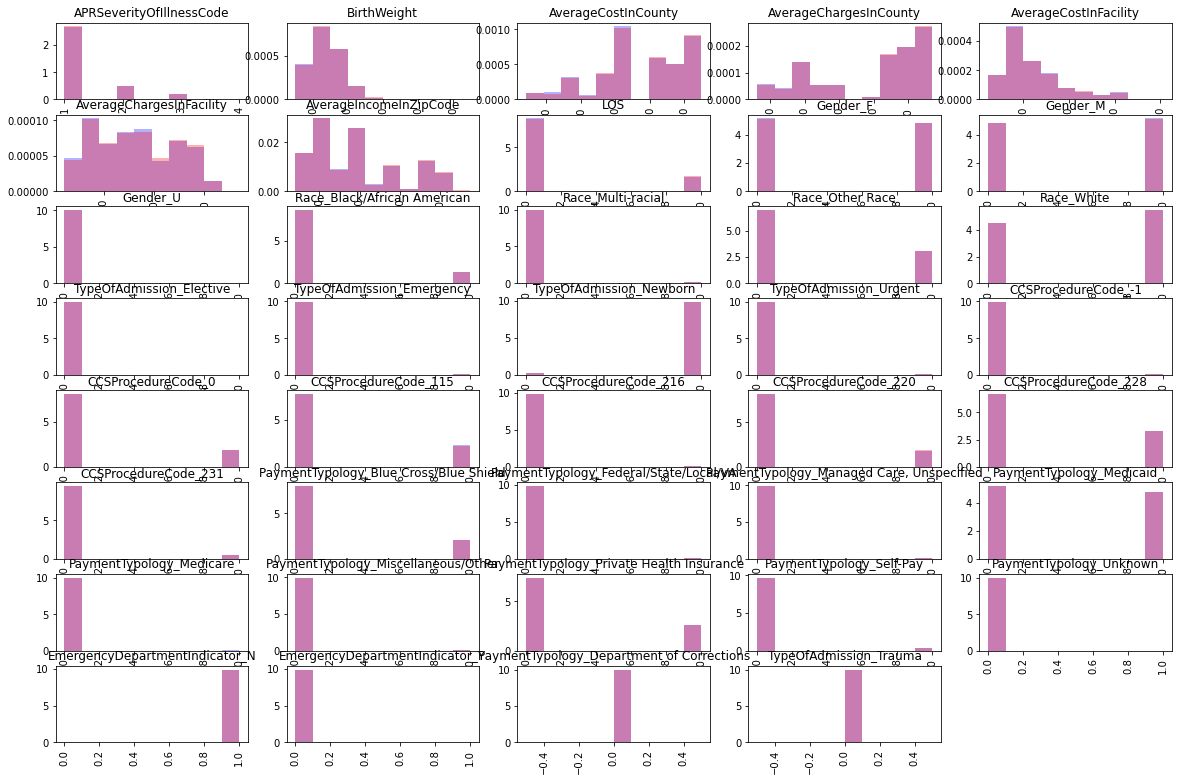

In [24]:
plt.figure(figsize=(20,20))
for i, col in enumerate(train_data.columns):
    plt.subplot(12,5,i+1)
    _, bins, _ = plt.hist(train_data[col], alpha=0.3, color='b', density=True)
    plt.hist(test_data[col], bins=bins, alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

**Separate target variable**
We remove our target variable from our attributes (X) and create an array of y.

In [25]:
train_X = train_data.drop(['LOS',], axis=1)
train_y = train_data[['LOS']]

test_X = test_data.drop(['LOS',], axis=1)
test_y = test_data[['LOS']]

### Rebalancing

As we can see the target variable is heavily weighted on 0 (< 4 days), we can test the effect of rebalancing our data such that our model can more accurately predict the under-represented class. As discussed by Jason Brownlee, 'most machine learning techniques will ignore, and in turn have poor performance on, the minority class' (2020). However, in some other publications there are arguments that balancing datasets does not improve the performance across the board and only maybe for some circumstances (Zumel, 2015).

In [26]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


To rebalance our data we will use the SMOTE method to synthetically oversample by raising our minority class (1) (Brownlee, 2020)

In [27]:
from imblearn.over_sampling  import SMOTE

smote_enn = SMOTE(random_state=42)

# Store in balanced data sets to perform comparisons later
train_X_bal, train_y_bal = smote_enn.fit_resample(train_X, train_y)

We can now see an even balance between our target variables

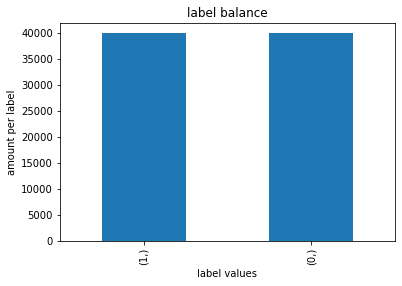

In [28]:
train_y_bal.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

### Distributing Skewed Numericals

Just as we did with our categorical attributes, we must normalise our numerical values in order to avoid weighting to one side of the range of values. We can see this from the skewed distribution of our values from earlier.

To normalise this we can power transform our skewed numerical attributes and MinMax them all in order to place them within the same range. From the sklearn documentation, if a feature has a variance that is much larger than others it may be weighted to that feature and cause the model to avoid lesser values (6.3. Preprocessing data — scikit-learn 0.24.1 documentation, 2021)

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

skewed_numericals = ['BirthWeight', 'AverageCostInCounty', 'AverageChargesInCounty', 'AverageCostInFacility', 'AverageIncomeInZipCode']
min_max_numericals = ['AverageChargesInFacility']

# Get scaled copies in order to maintain our old data
train_X_scaled = train_X.copy()
train_X_bal_scaled = train_X_bal.copy()
test_X_scaled = test_X.copy()

# Min max scale our evenly distributed attributes
minmaxscaler = MinMaxScaler().fit(train_X_scaled[min_max_numericals])
train_X_scaled.loc[:, min_max_numericals] = minmaxscaler.transform(train_X_scaled.loc[:, min_max_numericals])
test_X_scaled.loc[:, min_max_numericals] = minmaxscaler.transform(test_X_scaled.loc[:, min_max_numericals])

# Power transform the lognorm attributes and then min max scale them later
powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(train_X_scaled.loc[:, skewed_numericals])
train_X_scaled.loc[:, skewed_numericals] = powertransformer.transform(train_X_scaled.loc[:, skewed_numericals])
test_X_scaled.loc[:, skewed_numericals] = powertransformer.transform(test_X_scaled.loc[:, skewed_numericals])

minmaxscaler_pt = MinMaxScaler().fit(train_X_scaled.loc[:, skewed_numericals])
train_X_scaled.loc[:, skewed_numericals] = minmaxscaler_pt.transform(train_X_scaled.loc[:, skewed_numericals])
test_X_scaled.loc[:, skewed_numericals] = minmaxscaler_pt.transform(test_X_scaled.loc[:, skewed_numericals])

# Balanced X
# Min max scale our evenly distributed attributes
minmaxscaler = MinMaxScaler().fit(train_X_bal_scaled[min_max_numericals])
train_X_bal_scaled.loc[:, min_max_numericals] = minmaxscaler.transform(train_X_bal_scaled.loc[:, min_max_numericals])

# Power transform the lognorm attributes and then min max scale them later
powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(train_X_bal_scaled.loc[:, skewed_numericals])
train_X_bal_scaled.loc[:, skewed_numericals] = powertransformer.transform(train_X_bal_scaled.loc[:, skewed_numericals])

minmaxscaler_pt = MinMaxScaler().fit(train_X_bal_scaled.loc[:, skewed_numericals])
train_X_bal_scaled.loc[:, skewed_numericals] = minmaxscaler_pt.transform(train_X_bal_scaled.loc[:, skewed_numericals])



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Plotting the distributions to check if the skewed values are fixed

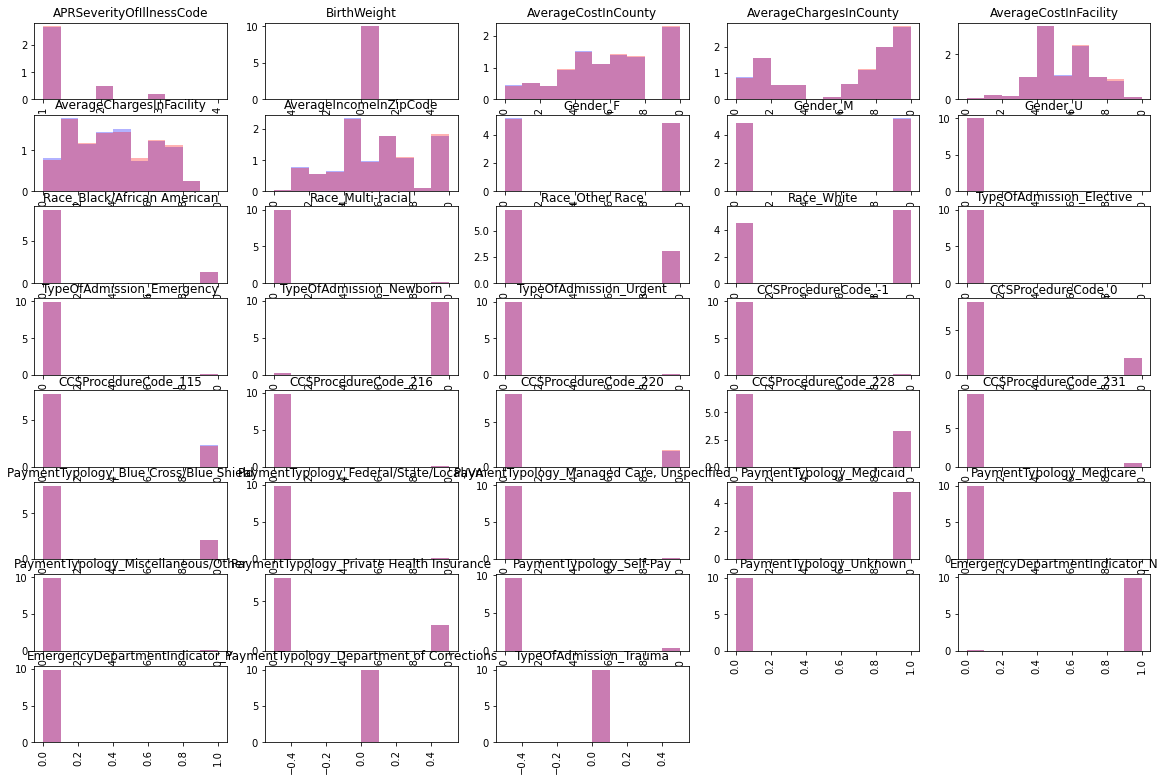

In [30]:
plt.figure(figsize=(20,20))
for i, col in enumerate(train_X_scaled.columns):
    plt.subplot(12,5,i+1)
    _, bins, _ = plt.hist(train_X_scaled[col], alpha=0.3, color='b', density=True)
    plt.hist(test_X_scaled[col], bins=bins, alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

## Baseline Model

Now that the data is pre-processed we can establish our baseline model. As this is a classification task, we can use:
- Logistic Regression
- Naive Bayes
- Decision Trees

As each model can be applied here, we will test each against our dataset and decide on the most likely achieve the greatest performance.

### Logistic Regression

This model uses a logistic function to separate and therefore classify the target from the data. As there doesn't seem to be a clear separation of relationships within our pair plots from earlier, we are likely not to achieve a great result here

- Solver: saga uses the stochastic average gradient descent algorithm and is good for larger datasets 
- Penalty: uses the l2 regularisation

**Unbalanced Data Set**

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, penalty='l2', solver='saga', 
                         max_iter=5000,
                         class_weight='balanced').fit(train_X_scaled, train_y.values.ravel())

# Cross validate model 5-folds
scores = cv_scorer(clf, train_X_scaled, train_y, 5)

print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

Train F1-Score score: 0.747
Validation F1-Score score: 0.746


**Balanced Data Set**

In [32]:
clf = LogisticRegression(random_state=0, penalty='l2', solver='saga', 
                         max_iter=5000, C=1,
                         class_weight='balanced').fit(train_X_bal_scaled, train_y_bal.values.ravel())

# Cross validate model 5-folds
scores = cv_scorer(clf, train_X_bal_scaled, train_y_bal, 5)

print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

Train F1-Score score: 0.869
Validation F1-Score score: 0.817


**Result**: we can see that the balanced data set has a greater performance and as regularisation is applied by default, there won't be much change in results any further

### Naive Bayes

This model allows us to assign probabilities against our set of data and the target. This can provide us with an extremly fast model generation and avoid issues in distribution as each class of values is evaluated independently (1.9. Naive Bayes — scikit-learn 0.24.1 documentation, 2021). As there isn't a clear distinction of classes within the pair plots, calculating probailibities may find a greater relationship.

We will use the Gaussian Naive Bayes algorithm as we have both numerical continuous and categorical data.

**Unbalanced Data Set**

In [33]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(train_X_scaled, train_y.values.ravel())

scores = cv_scorer(clf, train_X_scaled, train_y, 5)

print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

Train F1-Score score: 0.765
Validation F1-Score score: 0.764


**Balanced Data Set**

In [34]:
clf = GaussianNB().fit(train_X_bal_scaled, train_y_bal.values.ravel())

scores = cv_scorer(clf, train_X_bal_scaled, train_y_bal, 5)

print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

Train F1-Score score: 0.456
Validation F1-Score score: 0.454


**Result:** balancing the data set has not provided us with a greater performance, we can see in the unbalanced data set that it does have a good difference between our test and validation sets and it is performing better than the unbalanced logistic regression. However, we can find a better performance with the balanced logistic regression.

### Decision Tree

We can use a decision tree to calculate and assign rules based on our model, from these rules we may be able to distinctly predict unseen data. This can take a long time to generate given our data and attribute size however, similarly with Naive Bayes it may find better relationships in our data then logistic regression.

- Criterion: entropy splitting criteria calculates the tree generation using information gain, we can see some attributes have a correlation with the target therefore information gained may find the best tree

**Unbalanced Data Set**

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(criterion='entropy').fit(train_X_scaled, train_y)

scores = cv_scorer(clf, train_X_scaled, train_y, 5)

print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

Train F1-Score score: 0.883
Validation F1-Score score: 0.800


**Balanced Data Set**

In [36]:
clf = DecisionTreeClassifier(criterion='entropy').fit(train_X_bal_scaled, train_y_bal)

scores = cv_scorer(clf, train_X_bal_scaled, train_y_bal, 5)

print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

Train F1-Score score: 0.917
Validation F1-Score score: 0.827


**Result:** We are seeing a great training score in both data sets however this is due to the decision tree generating until fitting perfectly to the data. This is overfitting and to combat this we can tune the hyper parameters. The decision tree is the best option so far to move onto regularisation as both data sets have a high validation score, with the balanced being the greatest so far.

## Regularisation

As the decision tree is prone to overfitting to the data we must regularise the model by tuning the hyper-parameters within the function. We have two options by pre-pruning and post-pruning the leaves of the tree. 

### Pre-pruning

By pre-pruning we can clearly see which hyper-parameters are being set in order to reach an optimal model. These hyper-parameters we are interested in are:
- max_depth: the total depth of the tree, reducing this will be able to generalise our data better for unseen data points
- min_samples_split: the smallest number of data points in order to split a node into leaves, this effects our total depth and by increasing it may reduce the ability to learn relationships (Mithrakumar, 2019)
- min_samples_leaf: smallest number of data points allowed to be at a leaf node, large values also effect the ability to learn relationships (Mithrakumar, 2019)

#### Random Search Regularisation

As grid search is very resource intensive and we have a wide range of values to search upon, randoms search will allow us to find the best value in a shorter timeframe. Our values to search upon are:

- max_depth: 5-50 as too deep will cause overfitting
- min_samples_split: 2-40 as the ideal values are below 40 for the CART algorithm (Mithrakumar, 2019)
- min_samples_leaf: 1-20 as the ideal values are below 20 for the CART algorithm (Mithrakumar, 2019)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Populate parameters with range of linear integers
params = {
    'max_depth': [int(x) for x in np.linspace(5, 50, num=45)],
    'min_samples_split': [int(x) for x in np.linspace(2, 40, num=20)],
    'min_samples_leaf': [int(x) for x in np.linspace(1, 20, num=20)],
}

clf = tree.DecisionTreeClassifier(criterion='entropy')
gcv = RandomizedSearchCV(estimator=clf, scoring=f1_scorer, param_distributions=params, n_iter=100)

**Unbalanced Data Set**

In [38]:
# Fit best parameters to model
gcv.fit(train_X_scaled,train_y)

model = gcv.best_estimator_
clf = model.fit(train_X_scaled,train_y)

scores = cv_scorer(clf, train_X_scaled, train_y, 5)

print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

Train F1-Score score: 0.826
Validation F1-Score score: 0.810


In [39]:
best_params = gcv.best_params_
print(best_params)

{'min_samples_split': 38, 'min_samples_leaf': 12, 'max_depth': 29}


In [40]:
# Assign best parameters to be used in post-pruning later
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

**Balanced Data Set**

In [41]:
# Fit best parameters to model
gcv.fit(train_X_bal_scaled,train_y_bal)

model = gcv.best_estimator_
clf = model.fit(train_X_bal_scaled,train_y_bal)

scores = cv_scorer(clf, train_X_bal_scaled, train_y_bal, 5)

print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

Train F1-Score score: 0.907
Validation F1-Score score: 0.825


In [42]:
best_params = gcv.best_params_
print(best_params)

{'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 19}


In [43]:
# Assign best parameters to be used in post-pruning later
best_max_depth_bal = best_params['max_depth']
best_min_samples_split_bal = best_params['min_samples_split']
best_min_samples_leaf_bal = best_params['min_samples_leaf']

### Post-pruning

By post-pruning the tree, we remove leaves from the after it is built. We will determine the performance difference between building it up to our pre-pruned level and full building it, to then breaking it back down.

We can use sklearn's inbuilt post-pruning methods and parameter ccp_alpha in order to prune the tree.

**Unpruned - Balanced v Unbalanced**

We can see here that the balanced tree has more impurities in its leaves than the unbalanced one. We can also determine that the cost complexity alpha falls into the range of 0-0.1.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

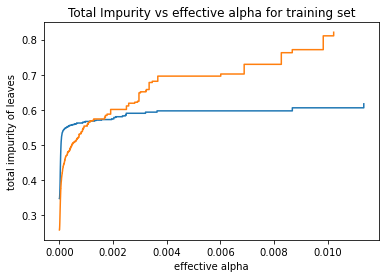

In [44]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

# Unbalanced

path = clf.cost_complexity_pruning_path(train_X_scaled, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Balanced

path = clf.cost_complexity_pruning_path(train_X_bal_scaled, train_y_bal)
ccp_alphas_bal, impurities_bal = path.ccp_alphas, path.impurities

# Plot cost complexities and the impurities in the leaves as a difference between both balanced and unbalanced data sets
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], drawstyle="steps-post")
ax.plot(ccp_alphas_bal[:-1], impurities_bal[:-1], drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

**Pruned - Balanced v Unbalanced**

We can also see here that the balanced tree has more impurities in its leaves than the unbalanced one. The pruned tree also starts at a higher level of impurity.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

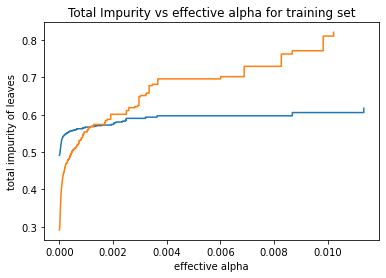

In [45]:
# Unbalanced

# Assign pruned values
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split)

path = clf.cost_complexity_pruning_path(train_X_scaled, train_y)
ccp_alphas_pruned, impurities_pruned = path.ccp_alphas, path.impurities

# Balanced

# Assigned pruned values
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth_bal, min_samples_leaf=best_min_samples_leaf_bal, min_samples_split=best_min_samples_split_bal)

path = clf.cost_complexity_pruning_path(train_X_bal_scaled, train_y_bal)
ccp_alphas_bal_pruned, impurities_bal_pruned = path.ccp_alphas, path.impurities

# Plot cost complexities and the impurities in the leaves as a difference between both balanced and unbalanced data sets
fig, ax = plt.subplots()
ax.plot(ccp_alphas_pruned[:-1], impurities_pruned[:-1], drawstyle="steps-post")
ax.plot(ccp_alphas_bal_pruned[:-1], impurities_bal_pruned[:-1], drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

As we can see the effective alpha is in the range of 0 - 0.01 and the impurity log function begins to turn at 0.002 we can generate our own alphas in a linear fashion in order to estimate their results without traversing a large array of potential data points

In [46]:
end = 0.002
num = 100
start = end / num

alpha_dummy = np.linspace(start=start, stop=end, num=num)

#### Calculating all models with effective alphas

Given our range of effective alphas we can now generate our range of models based on each

**Unpruned**

In [47]:
# Unbalanced data set
clfs = []
for ccp_alpha in alpha_dummy:
    clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha)
    clf.fit(train_X_scaled, train_y)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

# Balanced data set
clfs_bal = []
for ccp_alpha in alpha_dummy:
    clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha)
    clf.fit(train_X_bal_scaled, train_y_bal)
    clfs_bal.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs_bal[-1].tree_.node_count, ccp_alphas_bal[-1]))

Number of nodes in the last tree is: 25 with ccp_alpha: 0.03416139991661904
Number of nodes in the last tree is: 97 with ccp_alpha: 0.08953830820432251


**Pruned**

In [48]:
# Unbalanced data set
clfs_pruned = []
for ccp_alpha in alpha_dummy:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, ccp_alpha=ccp_alpha)
    clf.fit(train_X_scaled, train_y)
    clfs_pruned.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs_pruned[-1].tree_.node_count, ccp_alphas[-1]))

# Balanced data set
clfs_bal_pruned = []
for ccp_alpha in alpha_dummy:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth_bal, min_samples_leaf=best_min_samples_leaf_bal, min_samples_split=best_min_samples_split_bal, ccp_alpha=ccp_alpha)
    clf.fit(train_X_bal_scaled, train_y_bal)
    clfs_bal_pruned.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs_bal_pruned[-1].tree_.node_count, ccp_alphas_bal[-1]))

Number of nodes in the last tree is: 25 with ccp_alpha: 0.03416139991661904
Number of nodes in the last tree is: 97 with ccp_alpha: 0.08953830820432251


With our generated models we can now plot the number of nodes and depth of each tree against the alpha value which corresponds

**Unpruned**

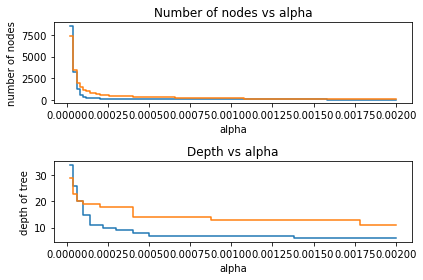

In [49]:
# Unbalanced

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Balanced

node_counts_bal = [clf.tree_.node_count for clf in clfs_bal]
depth_bal = [clf.tree_.max_depth for clf in clfs_bal]

# Plot the number of nodes and depth of each model
fig, ax = plt.subplots(2, 1)
ax[0].plot(alpha_dummy, node_counts, drawstyle="steps-post")
ax[0].plot(alpha_dummy, node_counts_bal, drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(alpha_dummy, depth, drawstyle="steps-post")
ax[1].plot(alpha_dummy, depth_bal, drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Pruned**

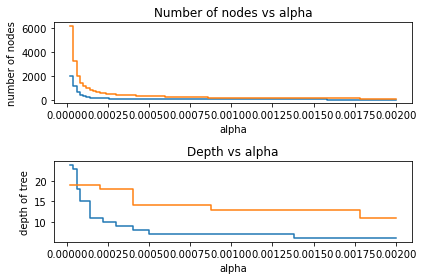

In [50]:
# Unbalanced

node_counts = [clf.tree_.node_count for clf in clfs_pruned]
depth = [clf.tree_.max_depth for clf in clfs_pruned]

# Balanced
node_counts_bal = [clf.tree_.node_count for clf in clfs_bal_pruned]
depth_bal = [clf.tree_.max_depth for clf in clfs_bal_pruned]

# Plot the number of nodes and depth of each model
fig, ax = plt.subplots(2, 1)
ax[0].plot(alpha_dummy, node_counts, drawstyle="steps-post")
ax[0].plot(alpha_dummy, node_counts_bal, drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(alpha_dummy, depth, drawstyle="steps-post")
ax[1].plot(alpha_dummy, depth_bal, drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Plotting performance of each model

We can now plot the performance of each model and determine the most effective alpha to maximise validation performance and minimise the discrepancy with the train set.

Note: we lower the level of cross validation here in order to reduce compute time

**Unpruned**

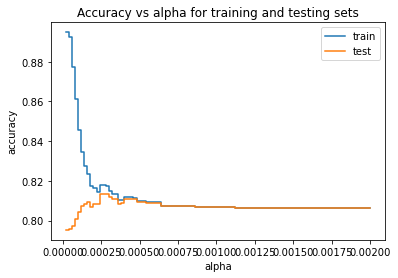

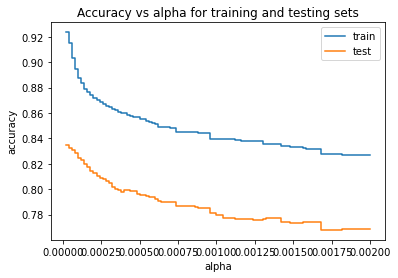

In [51]:
# Unbalanced

train_scores = []
val_scores = []
# Measure the performance of each model
for clf in clfs:
    # Reduce k for time complexity constraints
    scores = cv_scorer(clf, train_X_scaled, train_y, 2)
    train_scores.append(np.mean(scores['train_score']))
    val_scores.append(np.mean(scores['test_score']))
    
# Plot training versus validation scores
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alpha_dummy, train_scores, label="train",
        drawstyle="steps-post")
ax.plot(alpha_dummy, val_scores, label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# Balanced
train_scores_bal = []
val_scores_bal = []
for clf in clfs_bal:
    scores = cv_scorer(clf, train_X_bal_scaled, train_y_bal, 2)
    train_scores_bal.append(np.mean(scores['train_score']))
    val_scores_bal.append(np.mean(scores['test_score']))

# Plot training versus validation scores
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alpha_dummy, train_scores_bal, label="train",
        drawstyle="steps-post")
ax.plot(alpha_dummy, val_scores_bal, label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Pruned**

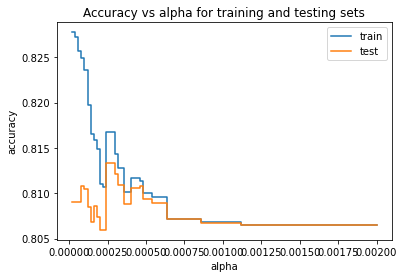

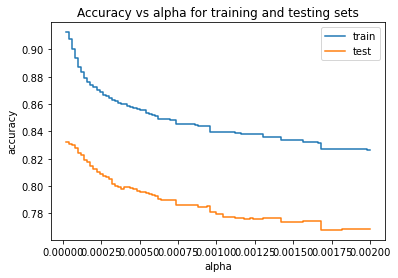

In [52]:
# Unbalanced

train_scores_pruned = []
val_scores_pruned = []
for clf in clfs_pruned:
    scores = cv_scorer(clf, train_X_scaled, train_y, 2)
    train_scores_pruned.append(np.mean(scores['train_score']))
    val_scores_pruned.append(np.mean(scores['test_score']))

# Plot training versus validation scores
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alpha_dummy, train_scores_pruned, label="train",
        drawstyle="steps-post")
ax.plot(alpha_dummy, val_scores_pruned, label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
    
# Balanced
train_scores_bal_pruned = []
val_scores_bal_pruned = []
for clf in clfs_bal_pruned:
    scores = cv_scorer(clf, train_X_bal_scaled, train_y_bal, 2)
    train_scores_bal_pruned.append(np.mean(scores['train_score']))
    val_scores_bal_pruned.append(np.mean(scores['test_score']))

# Plot training versus validation scores
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alpha_dummy, train_scores_bal_pruned, label="train",
        drawstyle="steps-post")
ax.plot(alpha_dummy, val_scores_bal_pruned, label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### Best Alpha

We can evaluate each set of performance measures in order to pick out the best alpha value

**Unpruned**

In [53]:
# Unbalanced
best = 0
for i, score in enumerate(val_scores):
    if train_scores[i] - val_scores[i] < train_scores[best] - val_scores[best] and val_scores[i] > val_scores[best]:
        best = i
                                            
print(best, train_scores[best], val_scores[best])

# Balanced
best_bal = 0
for i, score in enumerate(val_scores_bal):
    if train_scores_bal[i] - val_scores_bal[i] < train_scores_bal[best] - val_scores_bal[best] and val_scores_bal[i] > val_scores_bal[best]:
        best_bal = i
        
print(best_bal, train_scores_bal[best_bal], val_scores_bal[best_bal])

13 0.817561156340306 0.8131955633522788
7 0.8762124044233959 0.8177048783844876


**Pruned**

In [54]:
# Unbalanced
best_pruned = 0
for i, score in enumerate(val_scores_pruned):
    if train_scores_pruned[i] - val_scores_pruned[i] < train_scores_pruned[best] - val_scores_pruned[best] and val_scores_pruned[i] > val_scores_pruned[best]:
        best_pruned = i
                                            
print(best_pruned, train_scores_pruned[best_pruned], val_scores_pruned[best_pruned])

# Balanced
best_bal_pruned = 0
for i, score in enumerate(val_scores_bal_pruned):
    if train_scores_bal_pruned[i] - val_scores_bal_pruned[i] < train_scores_bal_pruned[best] - val_scores_bal_pruned[best] and val_scores_bal_pruned[i] > val_scores_bal_pruned[best]:
        best_bal_pruned = i
        
print(best_bal_pruned, train_scores_bal[best_bal_pruned], val_scores_bal[best_bal_pruned])

0 0.8277487080449062 0.8090278808730063
7 0.8762124044233959 0.8177048783844876


**Best alphas** - we have found our best alphas and can now use them in each model

In [55]:
# Assign the best alpha values to put into final models
alpha_key = alpha_dummy[best]
alpha_key_bal = alpha_dummy[best_bal]

alpha_key_pruned = alpha_dummy[best_pruned]
alpha_key_bal_pruned = alpha_dummy[best_bal_pruned]

#### Comparison of models

By comparing all models between pruned/unpruned and balanced/unbalanced, we find that applying post pruning on an unbalanced and not-pre-pruned model gives us the greatest performing model based on a high validation score and the smallest difference to the training score.

In [56]:
# Unpruned

# Unbalanced
clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=alpha_key).fit(train_X_scaled, train_y)

scores = cv_scorer(clf, train_X_scaled, train_y, 5)

print("Unpruned, Unbalanced:")
print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

# Balanced
clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=alpha_key_bal).fit(train_X_bal_scaled, train_y_bal)

scores = cv_scorer(clf, train_X_bal_scaled, train_y_bal, 5)

print("Unpruned, Balanced:")
print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

# Pruned

# Unbalanced
clf = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, ccp_alpha=alpha_key_pruned
                            ).fit(train_X_scaled, train_y)

scores = cv_scorer(clf, train_X_scaled, train_y, 5)

print("Pruned, Unbalanced:")
print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

# Balanced
clf = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth_bal, min_samples_leaf=best_min_samples_leaf_bal, min_samples_split=best_min_samples_split_bal, ccp_alpha=alpha_key_bal_pruned
                            ).fit(train_X_bal_scaled, train_y_bal)

scores = cv_scorer(clf, train_X_bal_scaled, train_y_bal, 5)

print("Pruned, Balanced:")
print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

Unpruned, Unbalanced:
Train F1-Score score: 0.815
Validation F1-Score score: 0.813
Unpruned, Balanced:
Train F1-Score score: 0.862
Validation F1-Score score: 0.804
Pruned, Unbalanced:
Train F1-Score score: 0.825
Validation F1-Score score: 0.810
Pruned, Balanced:
Train F1-Score score: 0.862
Validation F1-Score score: 0.804


### Random Forest
We will try to improve on our results using a random forest model, reducing the effect of any instability in the original trees.

After processing we can see that the results are not much better than the original trees, this could be due to not much instability

In [57]:
from sklearn.ensemble  import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', n_estimators=100)
clf.fit(train_X_scaled, train_y.values.ravel())

scores = cv_scorer(clf, train_X_scaled, train_y, 5)

print("Unbalanced:")
print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

clf.fit(train_X_bal_scaled, train_y_bal.values.ravel())

scores = cv_scorer(clf, train_X_bal_scaled, train_y_bal, 5)

print("Balanced:")
print("Train F1-Score score: {:.3f}".format(np.mean(scores['train_score'])))
print("Validation F1-Score score: {:.3f}".format(np.mean(scores['test_score'])))

Unbalanced:
Train F1-Score score: 0.886
Validation F1-Score score: 0.805
Balanced:
Train F1-Score score: 0.917
Validation F1-Score score: 0.828


## Test Model

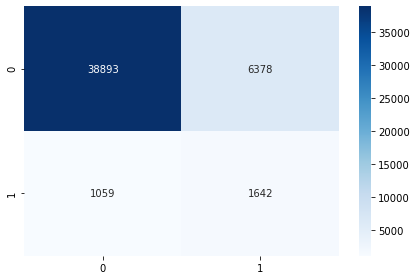

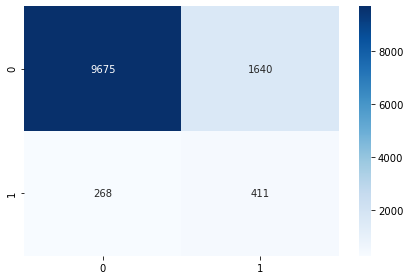

In [58]:
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=alpha_key).fit(train_X_scaled, train_y)

train_pred = clf.predict(train_X_scaled)

cf = confusion_matrix(train_pred, train_y)
sns.heatmap(cf,annot=True, cmap='Blues', fmt='g')
plt.tight_layout()
plt.show()
    
test_pred = clf.predict(test_X_scaled)

cf = confusion_matrix(test_pred, test_y)
sns.heatmap(cf,annot=True, cmap='Blues', fmt='g')
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics import classification_report
   
print(classification_report(train_y, train_pred,))
print(classification_report(test_y, test_pred,))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     39952
           1       0.61      0.20      0.31      8020

    accuracy                           0.84     47972
   macro avg       0.73      0.59      0.61     47972
weighted avg       0.82      0.84      0.81     47972

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9943
           1       0.61      0.20      0.30      2051

    accuracy                           0.84     11994
   macro avg       0.73      0.59      0.61     11994
weighted avg       0.81      0.84      0.81     11994



# Result and Ultimate Judgement

Based on the findings from evaluating multiple models ranging from Logistic Regression, Gaussian Naive Bayes, Decision Trees, and Random Forest, we can determine that based on the evaluation metric being the greatest validation F1 score with the least difference to the training score, the Unbalanced Post-Pruned Decision Tree results in the best model.

As we have discussed throughout this analysis, our data is heavily weighted towards LengthOfStay = 0, therefore due to this imbalance between the target value we are predicting many false positives. Given our circumstances to predict the LengthOfStay and assign resources as needed, it will be better to predict that patients will stay longer even if they do not. The resources will therefore be assigned and will not be utilised, which is better to the contrary of not having enough resources.

Given our restrictions on the project, namely no feature selection, we are also limited in our ability to accurately use correlated attributes to predict the target value.

# Predicting Unseen Data

In [60]:
unseen_frame = pd.read_csv('./test_data.csv', delimiter=',')
unseen_frame.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,1,New York City,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,2,New York City,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,3,New York City,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,4,New York City,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45
4,5,New York City,F,Other Race,Newborn,220,2,Medicaid,3800,N,3155,11381,3032,10135,59


Same number of columns - target

In [61]:
unseen_frame.shape

(69177, 15)

No nulls

In [62]:
unseen_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69177 entries, 0 to 69176
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            69177 non-null  int64 
 1   HealthServiceArea             69177 non-null  object
 2   Gender                        69177 non-null  object
 3   Race                          69177 non-null  object
 4   TypeOfAdmission               69177 non-null  object
 5   CCSProcedureCode              69177 non-null  int64 
 6   APRSeverityOfIllnessCode      69177 non-null  int64 
 7   PaymentTypology               69177 non-null  object
 8   BirthWeight                   69177 non-null  int64 
 9   EmergencyDepartmentIndicator  69177 non-null  object
 10  AverageCostInCounty           69177 non-null  int64 
 11  AverageChargesInCounty        69177 non-null  int64 
 12  AverageCostInFacility         69177 non-null  int64 
 13  AverageChargesIn

Grab ID column for appending later and drop non-attributes

In [63]:
unseen_ids = unseen_frame[['ID']]
unseen_frame = unseen_frame.drop(['ID', 'HealthServiceArea'], axis=1)
unseen_frame.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45
4,F,Other Race,Newborn,220,2,Medicaid,3800,N,3155,11381,3032,10135,59


Encode Categorical Attributes

In [64]:
categoricals_encoded = []
unseen_enc = unseen_frame.copy()

# Encode each nominal attribute
for col in categorical_nominal:
    # Fit encoder and ignore unknown values as we may be missing some in training data
    OneHotEncoder_c = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
    OneHotEncoder_c.fit(unseen_enc[[col]])
    
    # Transform the category
    onehot_ = OneHotEncoder_c.transform(unseen_enc[[col]]).toarray()
    
    # Append the values into new column
    for i in range(len(OneHotEncoder_c.categories_[0])):
        unseen_enc[col + '_' + str(OneHotEncoder_c.categories_[0][i])] = onehot_[:,i]
        categoricals_encoded.append(col + '_' + str(OneHotEncoder_c.categories_[0][i]))
    
    # Drop old category out of frame
    unseen_enc = unseen_enc.drop([col], axis=1)

    
print(categoricals_encoded)
unseen_enc.head()

['Gender_F', 'Gender_M', 'Gender_U', 'Race_Black/African American', 'Race_Multi-racial', 'Race_Other Race', 'Race_White', 'TypeOfAdmission_Elective', 'TypeOfAdmission_Emergency', 'TypeOfAdmission_Newborn', 'TypeOfAdmission_Trauma', 'TypeOfAdmission_Urgent', 'CCSProcedureCode_-1', 'CCSProcedureCode_0', 'CCSProcedureCode_115', 'CCSProcedureCode_216', 'CCSProcedureCode_220', 'CCSProcedureCode_228', 'CCSProcedureCode_231', 'PaymentTypology_Blue Cross/Blue Shield', 'PaymentTypology_Department of Corrections', 'PaymentTypology_Federal/State/Local/VA', 'PaymentTypology_Managed Care, Unspecified', 'PaymentTypology_Medicaid', 'PaymentTypology_Medicare', 'PaymentTypology_Miscellaneous/Other', 'PaymentTypology_Private Health Insurance', 'PaymentTypology_Self-Pay', 'PaymentTypology_Unknown', 'EmergencyDepartmentIndicator_N', 'EmergencyDepartmentIndicator_Y']


,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,Gender_F,Gender_M,Gender_U,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,3,4900,3242,8966,2448,13196,34,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,3100,2611,9227,1751,8951,45,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,3300,3155,11381,1052,11314,74,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,3300,2611,9227,3790,6250,45,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,2,3800,3155,11381,3032,10135,59,1,0,0,...,0,0,1,0,0,0,0,0,1,0


Normalise numerical attributes

In [65]:
skewed_numericals = ['BirthWeight', 'AverageCostInCounty', 'AverageChargesInCounty', 'AverageCostInFacility', 'AverageIncomeInZipCode']
min_max_numericals = ['AverageChargesInFacility']

# Get scaled copies in order to maintain our old data
unseen_scaled = unseen_enc.copy()

# Min max scale our evenly distributed attributes
unseen_scaled.loc[:, min_max_numericals] = minmaxscaler.transform(unseen_scaled.loc[:, min_max_numericals])

# Power transform the lognorm attributes and then min max scale them later
unseen_scaled.loc[:, skewed_numericals] = powertransformer.transform(unseen_scaled.loc[:, skewed_numericals])

unseen_scaled.loc[:, skewed_numericals] = minmaxscaler_pt.transform(unseen_scaled.loc[:, skewed_numericals])

Predict target and write to file

In [66]:
prediction = clf.predict(unseen_scaled)

predictions = pd.DataFrame(unseen_ids).join(pd.DataFrame(prediction, columns=['LengthOfStay']))

file = predictions.to_csv('./s366341_predictions.csv', index=False)

#### References

Brownlee, J., 2020. SMOTE for Imbalanced Classification with Python. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/> [Accessed 18 April 2021].

Jayaswal, V., 2020. Performance Metrics: Confusion matrix, Precision, Recall, and F1 Score. [online] Towards Data Science. Available at: <https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262> [Accessed 18 April 2021].

Mithrakumar, M., 2019. How to tune a Decision Tree?. [online] Towards Data Science. Available at: <https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680> [Accessed 18 April 2021].

Scikit-learn.org. 2021. 1.9. Naive Bayes — scikit-learn 0.24.1 documentation. [online] Available at: <https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes> [Accessed 18 April 2021].

Scikit-learn.org. 2021. 6.3. Preprocessing data — scikit-learn 0.24.1 documentation. [online] Available at: <https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler> [Accessed 18 April 2021].

Van Dorpe, S., 2018. Preprocessing with sklearn: a complete and comprehensive guide. [online] Towards Data Science. Available at: <https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9> [Accessed 18 April 2021].

Zumel, N., 2015. Does Balancing Classes Improve Classifier Performance?. [online] Win Vector LLC. Available at: <https://win-vector.com/2015/02/27/does-balancing-classes-improve-classifier-performance/> [Accessed 18 April 2021].